## import stuff

In [1]:
#importing things
import pandas as pd
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import sem
from scipy.stats import chi2
from scipy.stats import ttest_ind_from_stats
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from collections import OrderedDict
import seaborn as sns

## fetch the data

In [2]:
#read in data, remove genotypes that are missing from ch65a
ch65a = pd.DataFrame(pd.read_csv('Kds_CH65a_f3rem.csv',delimiter=',',dtype={'geno': str})) #here spurious counts for the missing fragment are removed
ch65b = pd.DataFrame(pd.read_csv('Kds_CH65b.tsv',delimiter='\t',dtype={'geno': str}))
ch65d = pd.DataFrame(pd.read_csv('Kds_CH65d.tsv',delimiter='\t',dtype={'geno': str}))
ch65e = pd.DataFrame(pd.read_csv('Kds_CH65e.tsv',delimiter='\t',dtype={'geno': str}))
ch65g = pd.DataFrame(pd.read_csv('Kds_CH65g.tsv',delimiter='\t',dtype={'geno': str}))
ch65h = pd.DataFrame(pd.read_csv('Kds_CH65h.tsv',delimiter='\t',dtype={'geno': str}))

In [3]:
ch65a.tail()

,geno,log10Kd,A,B,r2,sigma,mean_log10PE0,mean_log10PE1,mean_log10PE2,mean_log10PE3,...,std_log10PE2,std_log10PE3,std_log10PE4,std_log10PE5,std_log10PE6,std_log10PE7,std_log10PE8,std_log10PE9,Mean fluorescence expression,Std fluorescence expression
61435,1111111111111011,10.098448,22625.24768,142.772122,0.997865,0.231353,2.124585,4.354766,4.346785,4.393069,...,0.240721,0.297570,0.335817,0.260094,0.233203,0.249085,0.212811,0.197463,3.572207,0.247660
61436,1111111111111100,10.093580,18468.34723,131.825216,0.997867,0.205212,2.123794,4.348953,4.270108,4.252348,...,0.188422,0.264173,0.265964,0.198376,0.218314,0.228578,0.192756,0.198527,3.299557,0.218425
61437,1111111111111101,10.110953,18968.13623,131.596814,0.998527,0.216543,2.123878,4.349836,4.291823,4.264775,...,0.209378,0.254628,0.251573,0.218111,0.217625,0.256863,0.202290,0.205502,3.289589,0.213237
61438,1111111111111110,9.973018,20000.02664,130.405045,0.997656,0.205434,2.124403,4.365942,4.299229,4.315608,...,0.229433,0.257729,0.238000,0.224528,0.198704,0.239225,0.171902,0.215439,3.441004,0.238196
61439,1111111111111111,10.125226,21737.40134,148.845398,0.995517,0.230636,2.124127,4.352654,4.353424,4.423869,...,0.238975,0.283789,0.320859,0.241687,0.231668,0.254009,0.207577,0.185827,3.448194,0.231337


## Pinning Kd to boundaries, removing poor fits, merging replicates

In [4]:
#CH65A -- replacing things below the boundary with the boundary & then filter out all poor fits for binders
ch65a_filt = ch65a.copy()
column_name = "log10Kd"
new_value = 6
boolean_condition = (ch65a_filt.log10Kd < 6)|((ch65a_filt['mean_log10PE1'] < (1 + ch65a_filt['mean_log10PE0'])))
ch65a_filt.loc[boolean_condition, column_name] = new_value
ch65a_filt_out = ch65a_filt.loc[((ch65a_filt['log10Kd'] > 6) & (ch65a_filt['sigma'] <= 1) & (ch65a_filt['r2'] >= 0.8))|(ch65a_filt['log10Kd'] <= 6)]
print(ch65a['log10Kd'].mean(),ch65a_filt_out['log10Kd'].mean())
ch65a_filt_out.shape[0]

9.394707682658073 9.394628351821746


61424

In [5]:
#CH65B -- replacing things below the boundary with the boundary & then filter out all poor fits for binders
ch65b_filt = ch65b.copy()
column_name = "log10Kd"
new_value = 6
boolean_condition = (ch65b_filt.log10Kd < 6)|((ch65b_filt['mean_log10PE1'] < (1 + ch65b_filt['mean_log10PE0'])))
ch65b_filt.loc[boolean_condition, column_name] = new_value
ch65b_filt_out = ch65b_filt.loc[((ch65b_filt['log10Kd'] > 6) & (ch65b_filt['sigma'] <= 1) & (ch65b_filt['r2'] >= 0.8))|(ch65b_filt['log10Kd'] <= 6)]
print(ch65b['log10Kd'].mean(),ch65b_filt_out['log10Kd'].mean())
ch65b_filt_out.shape[0]

9.379017355548386 9.379008906163968


65519

In [6]:
#CH65D -- replacing things below the boundary with the boundary & then filter out all poor fits for binders
ch65d_filt = ch65d.copy()
column_name = "log10Kd"
new_value = 6
boolean_condition = (ch65d_filt.log10Kd < 6)|((ch65d_filt['mean_log10PE1'] < (1 + ch65d_filt['mean_log10PE0'])))
ch65d_filt.loc[boolean_condition, column_name] = new_value
ch65d_filt_out = ch65d_filt.loc[((ch65d_filt['log10Kd'] > 6) & (ch65d_filt['sigma'] <= 1) & (ch65d_filt['r2'] >= 0.8))|(ch65d_filt['log10Kd'] <= 6)]
print(ch65d['log10Kd'].mean(),ch65d_filt_out['log10Kd'].mean())
ch65d_filt_out.shape[0]

6.151715169305505 6.7055690021330046


64296

In [7]:
#CH65E -- replacing things below the boundary with the boundary & then filter out all poor fits for binders
ch65e_filt = ch65e.copy()
column_name = "log10Kd"
new_value = 6
boolean_condition = (ch65e_filt.log10Kd < 6)|((ch65e_filt['mean_log10PE1'] < (1 + ch65e_filt['mean_log10PE0'])))
ch65e_filt.loc[boolean_condition, column_name] = new_value
ch65e_filt_out = ch65e_filt.loc[((ch65e_filt['log10Kd'] > 6) & (ch65e_filt['sigma'] <= 1) & (ch65e_filt['r2'] >= 0.8))|(ch65e_filt['log10Kd'] <= 6)]
print(ch65e['log10Kd'].mean(),ch65e_filt_out['log10Kd'].mean())
ch65e_filt_out.shape[0]

6.181213102216324 6.721751661208522


65006

In [8]:
#ch65g -- replacing things below the boundary with the boundary & then filter out all poor fits for binders
ch65g_filt = ch65g.copy()
column_name = "log10Kd"
new_value = 6
boolean_condition = (ch65g_filt.log10Kd < 6)|((ch65g_filt['mean_log10PE1'] < (1 + ch65g_filt['mean_log10PE0'])))
ch65g_filt.loc[boolean_condition, column_name] = new_value
ch65g_filt_out = ch65g_filt.loc[((ch65g_filt['log10Kd'] > 6) & (ch65g_filt['sigma'] <= 1) & (ch65g_filt['r2'] >= 0.8))|(ch65g_filt['log10Kd'] <= 6)]
print(ch65g['log10Kd'].mean(),ch65g_filt_out['log10Kd'].mean())
ch65g_filt_out.shape[0]

8.482388536554899 8.364883755899045


64388

In [9]:
#ch65h -- replacing things below the boundary with the boundary & then filter out all poor fits for binders
ch65h_filt = ch65h.copy()
column_name = "log10Kd"
new_value = 6
boolean_condition = (ch65h_filt.log10Kd < 6)|((ch65h_filt['mean_log10PE1'] < (1 + ch65h_filt['mean_log10PE0'])))
ch65h_filt.loc[boolean_condition, column_name] = new_value
ch65h_filt_out = ch65h_filt.loc[((ch65h_filt['log10Kd'] > 6) & (ch65h_filt['sigma'] <= 1) & (ch65h_filt['r2'] >= 0.8))|(ch65h_filt['log10Kd'] <= 6)]
print(ch65h['log10Kd'].mean(),ch65h_filt_out['log10Kd'].mean())
ch65h_filt_out.shape[0]

8.55045645964511 8.450101352733409


63315

## merging and averaging

In [10]:
MA90_filt = pd.DataFrame()
MA90_filt = pd.merge(ch65a_filt_out, ch65b_filt_out, on='geno', how='outer',suffixes=("_a", "_b"))
MA90_filt['log10Kd'] = MA90_filt[['log10Kd_a', 'log10Kd_b']].mean(axis=1)
MA90_filt['err_log10Kd'] = MA90_filt[['log10Kd_a', 'log10Kd_b']].sem(axis=1)
MA90_filt['mean_sigma'] = MA90_filt[['sigma_a', 'sigma_b']].sem(axis=1)
MA90_filt['log10Kd_pinned'] = MA90_filt['log10Kd']
MA90_filt['expression_norm_a'] = MA90_filt['Mean fluorescence expression_a']/np.mean(MA90_filt['Mean fluorescence expression_a'])
MA90_filt['expression_norm_b'] = MA90_filt['Mean fluorescence expression_b']/np.mean(MA90_filt['Mean fluorescence expression_b'])
MA90_filt['expression_norm'] = (MA90_filt['expression_norm_a']+MA90_filt['expression_norm_b'])/2
MA90_filt.to_csv('Kd_processed/20220504_CH65_MA90_browser.tsv', index=False, sep="\t")

In [12]:
MA90_filt.head()

,geno,log10Kd_a,A_a,B_a,r2_a,sigma_a,mean_log10PE0_a,mean_log10PE1_a,mean_log10PE2_a,mean_log10PE3_a,...,std_log10PE9_b,Mean fluorescence expression_b,Std fluorescence expression_b,log10Kd,err_log10Kd,mean_sigma,log10Kd_pinned,expression_norm_a,expression_norm_b,expression_norm
0,0000000000000000,8.608953,17697.34585,168.367463,0.996489,0.231708,2.123829,4.285049,4.255524,4.229063,...,0.251087,3.358096,0.303816,8.537283,0.071670,0.049268,8.537283,0.966689,0.945661,0.956175
1,0000000000000001,8.631288,18900.14933,168.060271,0.995615,0.232124,2.124544,4.320524,4.265977,4.287232,...,0.262570,3.462726,0.301187,8.570142,0.061146,0.055551,8.570142,0.988638,0.975126,0.981882
2,0000000000000010,8.338562,21166.80067,173.668112,0.993252,0.211398,2.123645,4.420804,4.306047,4.181505,...,0.253616,3.553913,0.313580,8.320426,0.018136,0.063929,8.320426,0.976553,1.000804,0.988679
3,0000000000000011,8.512202,28522.07895,171.735708,0.995305,0.215995,2.123669,4.505270,4.464569,4.431401,...,0.238343,3.665341,0.307562,8.474563,0.037638,0.046984,8.474563,1.041457,1.032183,1.036820
4,0000000000000100,8.548888,20071.00682,161.778114,0.994419,0.210680,2.123693,4.436401,4.234106,4.194388,...,0.238396,3.560903,0.290202,8.537787,0.011101,0.047722,8.537787,0.956046,1.002773,0.979409


In [54]:
#compare to yoda h3 and fluB
yoda = pd.DataFrame(pd.read_csv('20210427_HA_unadj_fil_merg.csv',dtype={'variant': str}))
yoda['h1_delta']= abs(yoda['repa_x']-yoda['repb_x'])
yoda['h3_delta']= abs(yoda['repa_y']-yoda['repb_y'])
yoda['fluB_delta']= abs(yoda['repa']-yoda['repb'])
MA90_filt['rep_delta']= abs(MA90_filt['log10Kd_a']-MA90_filt['log10Kd_b'])
SI06_filt['rep_delta']= abs(SI06_filt['log10Kd_d']-SI06_filt['log10Kd_e'])
G189E_filt['rep_delta']= abs(G189E_filt['log10Kd_g']-G189E_filt['log10Kd_h'])

/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


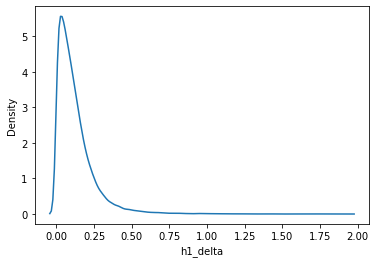

In [56]:
sns.kdeplot(yoda['h1_delta'])

/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


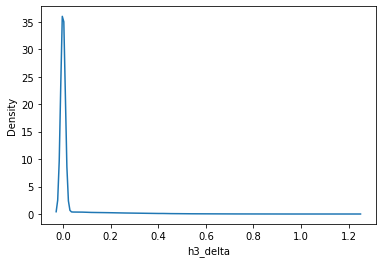

In [57]:
sns.kdeplot(yoda['h3_delta'])

/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


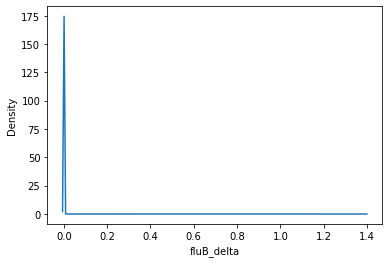

In [58]:
sns.kdeplot(yoda['fluB_delta'])

/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


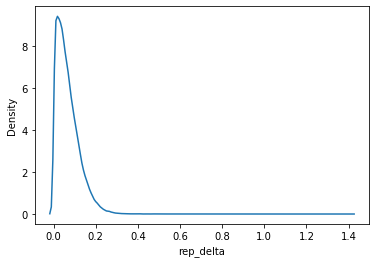

In [59]:
sns.kdeplot(MA90_filt['rep_delta'])

/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


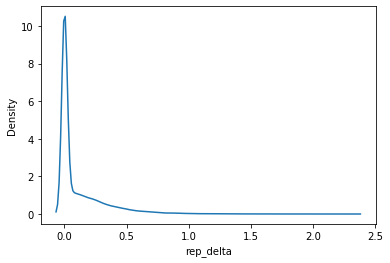

In [60]:
sns.kdeplot(SI06_filt['rep_delta'])

/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


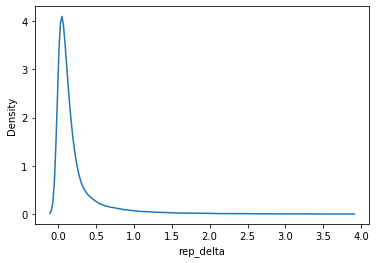

In [61]:
sns.kdeplot(G189E_filt['rep_delta'])

In [17]:
SI06_filt = pd.DataFrame()
SI06_filt = pd.merge(ch65d_filt_out, ch65e_filt_out, on='geno', how='outer',suffixes=("_d", "_e"))
SI06_filt['log10Kd'] = SI06_filt[['log10Kd_d', 'log10Kd_e']].mean(axis=1)
SI06_filt['err_log10Kd'] = SI06_filt[['log10Kd_d', 'log10Kd_e']].sem(axis=1)
SI06_filt['mean_sigma'] = SI06_filt[['sigma_d', 'sigma_e']].sem(axis=1)
SI06_filt['log10Kd_pinned'] = SI06_filt['log10Kd']
SI06_filt['expression_norm_d'] = SI06_filt['Mean fluorescence expression_d']/np.mean(SI06_filt['Mean fluorescence expression_d'])
SI06_filt['expression_norm_e'] = SI06_filt['Mean fluorescence expression_e']/np.mean(SI06_filt['Mean fluorescence expression_e'])
SI06_filt['expression_norm'] = (SI06_filt['expression_norm_d']+SI06_filt['expression_norm_e'])/2
SI06_filt.to_csv('Kd_processed/20220504_CH65_SI06_browser.tsv', index=False, sep="\t")

In [18]:
G189E_filt = pd.DataFrame()
G189E_filt = pd.merge(ch65g_filt_out, ch65h_filt_out, on='geno', how='outer',suffixes=("_g", "_h"))
G189E_filt['log10Kd'] = G189E_filt[['log10Kd_g', 'log10Kd_h']].mean(axis=1)
G189E_filt['err_log10Kd'] = G189E_filt[['log10Kd_g', 'log10Kd_h']].sem(axis=1)
G189E_filt['mean_sigma'] = G189E_filt[['sigma_g', 'sigma_h']].sem(axis=1)
G189E_filt['log10Kd_pinned'] = G189E_filt['log10Kd']
# G189E_filt['expression_norm_g'] = G189E_filt['Mean fluorescence expression_g']/np.mean(G189E_filt['Mean fluorescence expression_g'])
# G189E_filt['expression_norm_h'] = G189E_filt['Mean fluorescence expression_h']/np.mean(G189E_filt['Mean fluorescence expression_h'])
# G189E_filt['expression_norm'] = (G189E_filt['expression_norm_g']+G189E_filt['expression_norm_h'])/2
G189E_filt.to_csv('Kd_processed/20220504_CH65_G189E_browser.tsv', index=False, sep="\t")

In [44]:
G189E_filt

,geno,log10Kd_g,A_g,B_g,r2_g,sigma_g,mean_log10PE0_g,mean_log10PE1_g,mean_log10PE2_g,mean_log10PE3_g,...,std_log10PE4_h,std_log10PE5_h,std_log10PE6_h,std_log10PE7_h,std_log10PE8_h,std_log10PE9_h,log10Kd,err_log10Kd,mean_sigma,log10Kd_pinned
0,0000000000000000,6.0,934.200189,226.736047,0.791656,0.912848,2.125425,2.982403,2.736316,2.503505,...,0.208749,0.218167,0.206219,0.255087,0.291710,0.218761,6.000000,0.0,0.064246,6.000000
1,0000000000000001,6.0,645.218182,199.270866,0.737069,0.725880,2.124913,3.082337,2.758659,2.567978,...,0.209370,0.215818,0.200254,0.270486,0.230040,0.203035,6.000000,0.0,0.087012,6.000000
2,0000000000000010,6.0,1002.826176,219.373131,0.715181,1.877597,2.125305,2.813474,2.521499,2.409583,...,0.203482,0.212950,0.196675,0.240343,0.296276,0.214345,6.000000,0.0,4.038758,6.000000
3,0000000000000011,6.0,257.862501,177.307960,0.751798,0.826208,2.124733,2.763564,2.635144,2.629454,...,0.185992,0.206708,0.181295,0.217124,0.205594,0.194594,6.000000,0.0,0.113704,6.000000
4,0000000000000100,6.0,751.265462,213.823900,0.793857,1.087375,2.126378,2.860651,2.623315,2.318218,...,0.189542,0.198863,0.187992,0.211002,0.227868,0.193721,6.000000,0.0,0.243864,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65219,1101110000001101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.271327,0.353346,0.315932,0.359809,0.345143,0.233846,7.188260,NaN,NaN,7.188260
65220,1101110000010010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.212409,0.242959,0.269939,0.280517,0.245141,0.218386,7.479065,NaN,NaN,7.479065
65221,1101110100010001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.242145,0.306524,0.271116,0.283605,0.273448,0.261437,6.719062,NaN,NaN,6.719062
65222,1111000011011000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.283490,0.334162,0.268357,0.303376,0.393298,0.257453,7.623762,NaN,NaN,7.623762


In [45]:
MA90_filt

,geno,log10Kd_a,A_a,B_a,r2_a,sigma_a,mean_log10PE0_a,mean_log10PE1_a,mean_log10PE2_a,mean_log10PE3_a,...,std_log10PE9_b,Mean fluorescence expression_b,Std fluorescence expression_b,log10Kd,err_log10Kd,mean_sigma,log10Kd_pinned,expression_norm_a,expression_norm_b,expression_norm
0,0000000000000000,8.608953,17697.34585,168.367463,0.996489,0.231708,2.123829,4.285049,4.255524,4.229063,...,0.251087,3.358096,0.303816,8.537283,0.071670,0.049268,8.537283,0.966689,0.945661,0.956175
1,0000000000000001,8.631288,18900.14933,168.060271,0.995615,0.232124,2.124544,4.320524,4.265977,4.287232,...,0.262570,3.462726,0.301187,8.570142,0.061146,0.055551,8.570142,0.988638,0.975126,0.981882
2,0000000000000010,8.338562,21166.80067,173.668112,0.993252,0.211398,2.123645,4.420804,4.306047,4.181505,...,0.253616,3.553913,0.313580,8.320426,0.018136,0.063929,8.320426,0.976553,1.000804,0.988679
3,0000000000000011,8.512202,28522.07895,171.735708,0.995305,0.215995,2.123669,4.505270,4.464569,4.431401,...,0.238343,3.665341,0.307562,8.474563,0.037638,0.046984,8.474563,1.041457,1.032183,1.036820
4,0000000000000100,8.548888,20071.00682,161.778114,0.994419,0.210680,2.123693,4.436401,4.234106,4.194388,...,0.238396,3.560903,0.290202,8.537787,0.011101,0.047722,8.537787,0.956046,1.002773,0.979409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65526,1111110101111011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.295880,3.533443,0.329860,9.994895,NaN,NaN,9.994895,NaN,0.995040,NaN
65527,1111110101111100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.358310,3.377955,0.314376,9.891578,NaN,NaN,9.891578,NaN,0.951253,NaN
65528,1111110101111101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.320370,3.436163,0.369505,9.880108,NaN,NaN,9.880108,NaN,0.967645,NaN
65529,1111110101111110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.318204,3.351128,0.361342,9.881571,NaN,NaN,9.881571,NaN,0.943699,NaN


In [9]:
#making files that dont have N52H to see how much this changes SI06 browser structure
MA90 = pd.DataFrame(pd.read_csv('Kd_processed/20220504_CH65_MA90_browser.tsv',delimiter='\t',dtype={'geno': str}))
SI06 = pd.DataFrame(pd.read_csv('Kd_processed/20220504_CH65_SI06_browser.tsv',delimiter='\t',dtype={'geno': str}))
G189E = pd.DataFrame(pd.read_csv('Kd_processed/20220504_CH65_G189E_browser.tsv',delimiter='\t',dtype={'geno': str}))
MA90

,geno,log10Kd_a,A_a,B_a,r2_a,sigma_a,mean_log10PE0_a,mean_log10PE1_a,mean_log10PE2_a,mean_log10PE3_a,...,std_log10PE9_b,Mean fluorescence expression_b,Std fluorescence expression_b,log10Kd,err_log10Kd,mean_sigma,log10Kd_pinned,expression_norm_a,expression_norm_b,expression_norm
0,0000000000000000,8.608953,17697.34585,168.367463,0.996489,0.231708,2.123829,4.285049,4.255524,4.229063,...,0.251087,3.358096,0.303816,8.537283,0.071670,0.049268,8.537283,0.966689,0.945661,0.956175
1,0000000000000001,8.631288,18900.14933,168.060271,0.995615,0.232124,2.124544,4.320524,4.265977,4.287232,...,0.262570,3.462726,0.301187,8.570142,0.061146,0.055551,8.570142,0.988638,0.975126,0.981882
2,0000000000000010,8.338562,21166.80067,173.668112,0.993252,0.211398,2.123645,4.420804,4.306047,4.181505,...,0.253616,3.553913,0.313580,8.320426,0.018136,0.063929,8.320426,0.976553,1.000804,0.988679
3,0000000000000011,8.512202,28522.07895,171.735708,0.995305,0.215995,2.123669,4.505270,4.464569,4.431401,...,0.238343,3.665341,0.307562,8.474563,0.037638,0.046984,8.474563,1.041457,1.032183,1.036820
4,0000000000000100,8.548888,20071.00682,161.778114,0.994419,0.210680,2.123693,4.436401,4.234106,4.194388,...,0.238396,3.560903,0.290202,8.537787,0.011101,0.047722,8.537787,0.956046,1.002773,0.979409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65526,1111110101111011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.295880,3.533443,0.329860,9.994895,NaN,NaN,9.994895,NaN,0.995040,NaN
65527,1111110101111100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.358310,3.377955,0.314376,9.891578,NaN,NaN,9.891578,NaN,0.951253,NaN
65528,1111110101111101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.320370,3.436163,0.369505,9.880108,NaN,NaN,9.880108,NaN,0.967645,NaN
65529,1111110101111110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.318204,3.351128,0.361342,9.881571,NaN,NaN,9.881571,NaN,0.943699,NaN


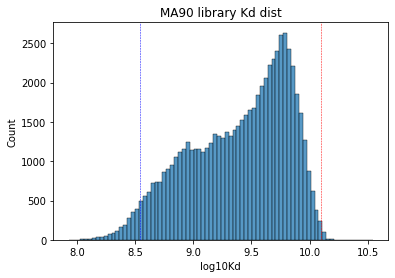

In [16]:
sns.histplot(data=MA90, x='log10Kd')
plt.title('MA90 library Kd dist')
plt.axvline(x=8.54,linestyle='dashed',linewidth=0.5,color='blue')
plt.axvline(x=10.1,linestyle='dashed',linewidth=0.5,color='red')

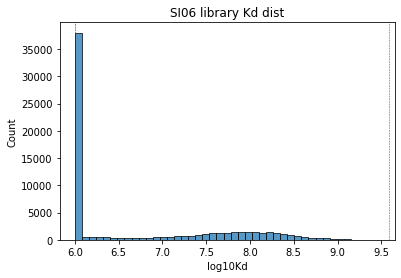

In [17]:
sns.histplot(data=SI06, x='log10Kd')
plt.title('SI06 library Kd dist')
plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='blue')
plt.axvline(x=9.59,linestyle='dashed',linewidth=0.5,color='red')

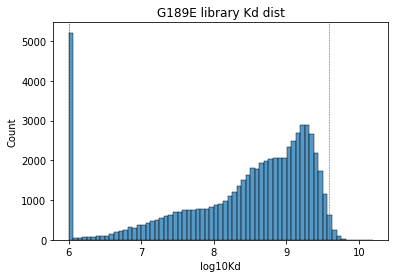

In [18]:
sns.histplot(data=G189E, x='log10Kd')
plt.title('G189E library Kd dist')
plt.axvline(x=6,linestyle='dashed',linewidth=0.5,color='blue')
plt.axvline(x=9.59,linestyle='dashed',linewidth=0.5,color='red')